# Problem: 

**Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştirebilir misiniz?**

- Amaç bir bankanın müşterilerinin bankayı terk etme ya da terk etmeme durumunun tahmin edilmesidir.

- Müşteri terkini tanımlayan olay müşterinin banka hesabını kapatmasıdır.

**Veri Seti Hikayesi:**

- 10000 gözlemden ve 12 değişkenden oluşmaktadır. 
- Bağımsız değişkenler müşterilere ilişkin bilgiler barındırmaktadır.
- Bağımlı değişken müşteri terk durumunu ifade etmektedir.

**Değişkenler:**

- Surname : Soy isim
- CreditScore : Kredi skoru
- Geography : Ülke (Germany/France/Spain)
- Gender : Cinsiyet (Female/Male)
- Age : Yaş
- Tenure : Kaç yıllık müşteri
- Balance : Bakiye
- NumOfProducts : Kullanılan banka ürünü
- HasCrCard : Kredi kartı durumu (0=No,1=Yes)
- IsActiveMember : Aktif üyelik durumu (0=No,1=Yes)
- EstimatedSalary : Tahmini maaş
- Exited : Terk mi değil mi? (0=No,1=Yes)


# Data Understanding

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


import warnings
warnings.filterwarnings("ignore")


In [81]:
df = pd.read_csv("churn.csv", index_col=0)

In [82]:
df.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [84]:
df.shape

(10000, 13)

In [85]:
df['CustomerId'].nunique()

10000

# EDA

### Missing Values

In [86]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [88]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [89]:
# categoric - numeric features 
cat_features = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']# 'CustomerId','Surname', 
num_features = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

### Outliers

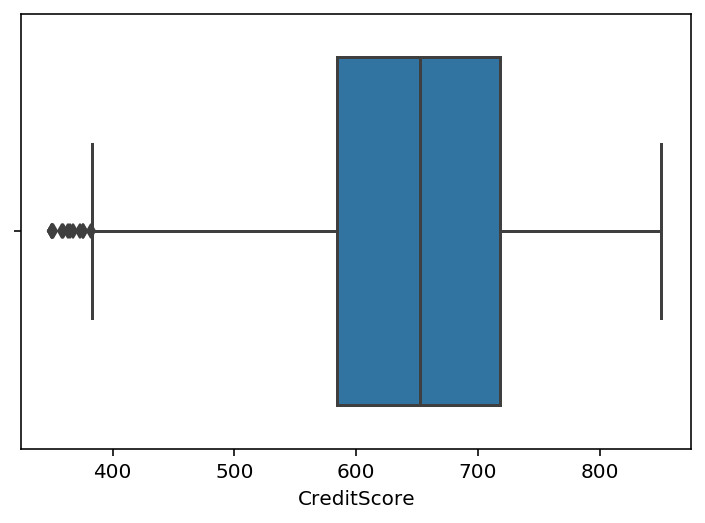

CreditScore  : 15


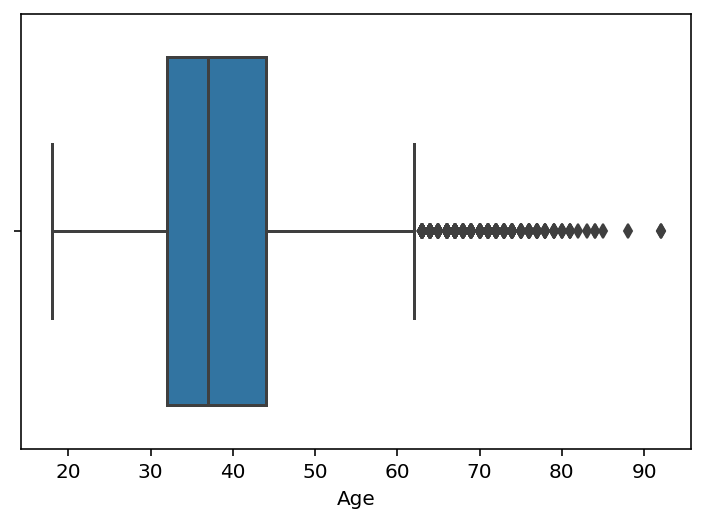

Age  : 359


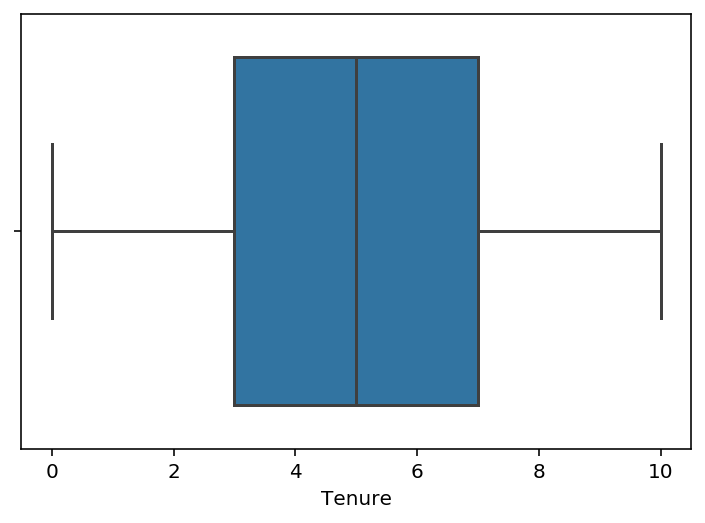

Tenure  : 0


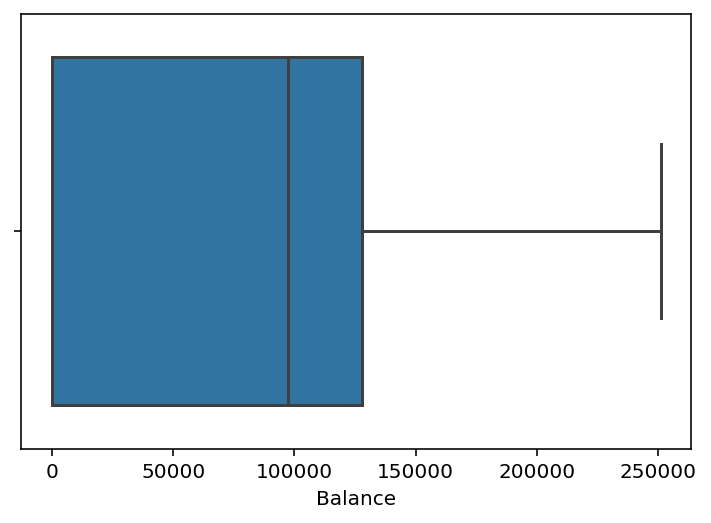

Balance  : 0


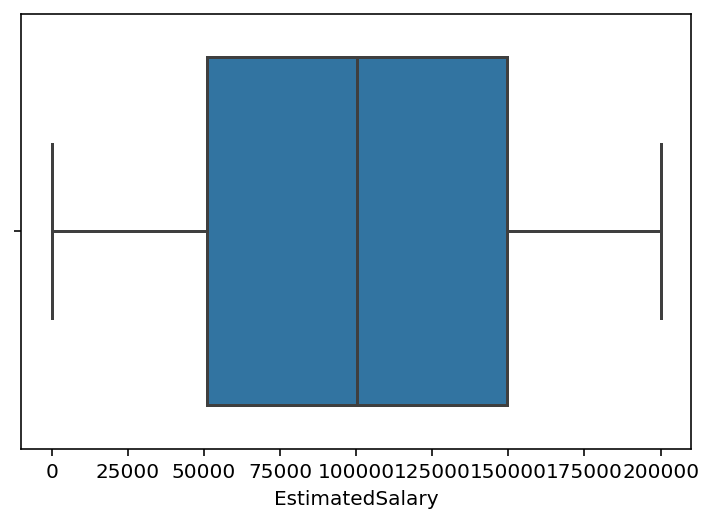

EstimatedSalary  : 0


In [90]:
# Outliers 1.way: Filling - Droping

for feature in num_features:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    IQR = Q3-Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    
    # Visualization of outliers
    
    sns.boxplot(x = df[feature])
    plt.show()

    
    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature," : " + str(df[(df[feature] > upper) | (df[feature] < lower)].shape[0]))
    else:
        print(feature, " : 0")
        
    #Filling outliers with upper or lower limit :
    
    #df[df[feature] < upper][feature] = upper
    ##df[df[feature] > lower][feature] = lower
    
    #Dropping outliers : 
    
    #df = df[df[feature]<upper]

In [91]:
# 2.way: LOF - Local Outlier Factor 
from sklearn.neighbors import LocalOutlierFactor

clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
clf.fit_predict(df[num_features])
df_scores=clf.negative_outlier_factor_
df_scores= np.sort(df_scores)
df_scores[0:20]

array([-31.49671623, -27.44933781, -26.14267979, -19.30703544,
       -18.13177654, -17.84143228,  -7.51080634,  -2.57672799,
        -1.94375424,  -1.87606469,  -1.86952071,  -1.84846825,
        -1.7831819 ,  -1.73424051,  -1.6544467 ,  -1.62935919,
        -1.6104212 ,  -1.56961088,  -1.56190545,  -1.55336258])

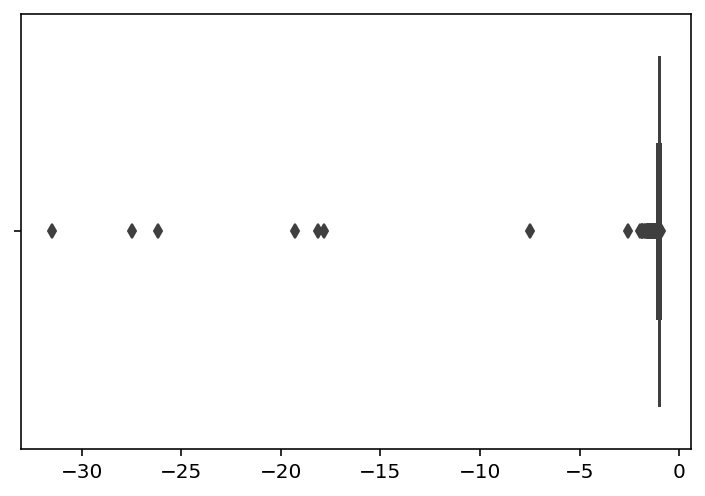

In [92]:
sns.boxplot(df_scores);

In [93]:
threshold=np.sort(df_scores)[7]
print(threshold)
df = df.loc[df_scores > threshold]
df = df.reset_index(drop=True)

-2.576727994023382


In [94]:
df.shape

(9992, 13)

### Exploring Target Features

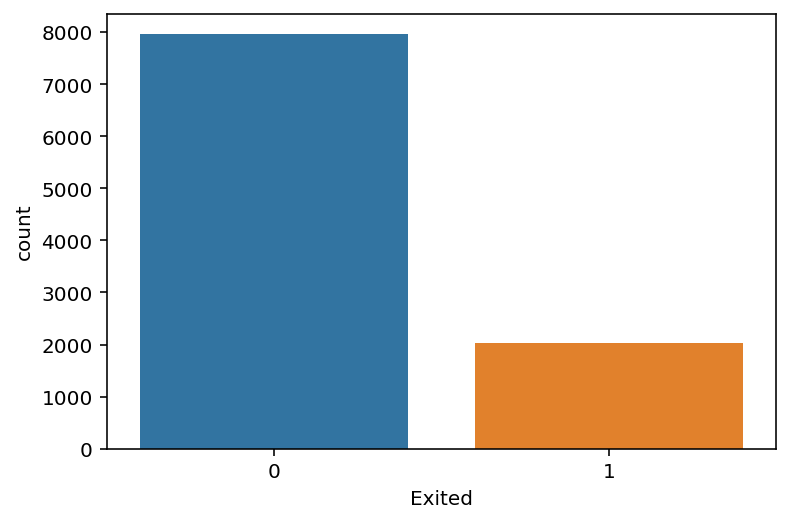

In [95]:
sns.countplot(x='Exited' , data=df)

### Exploring Numeric Features

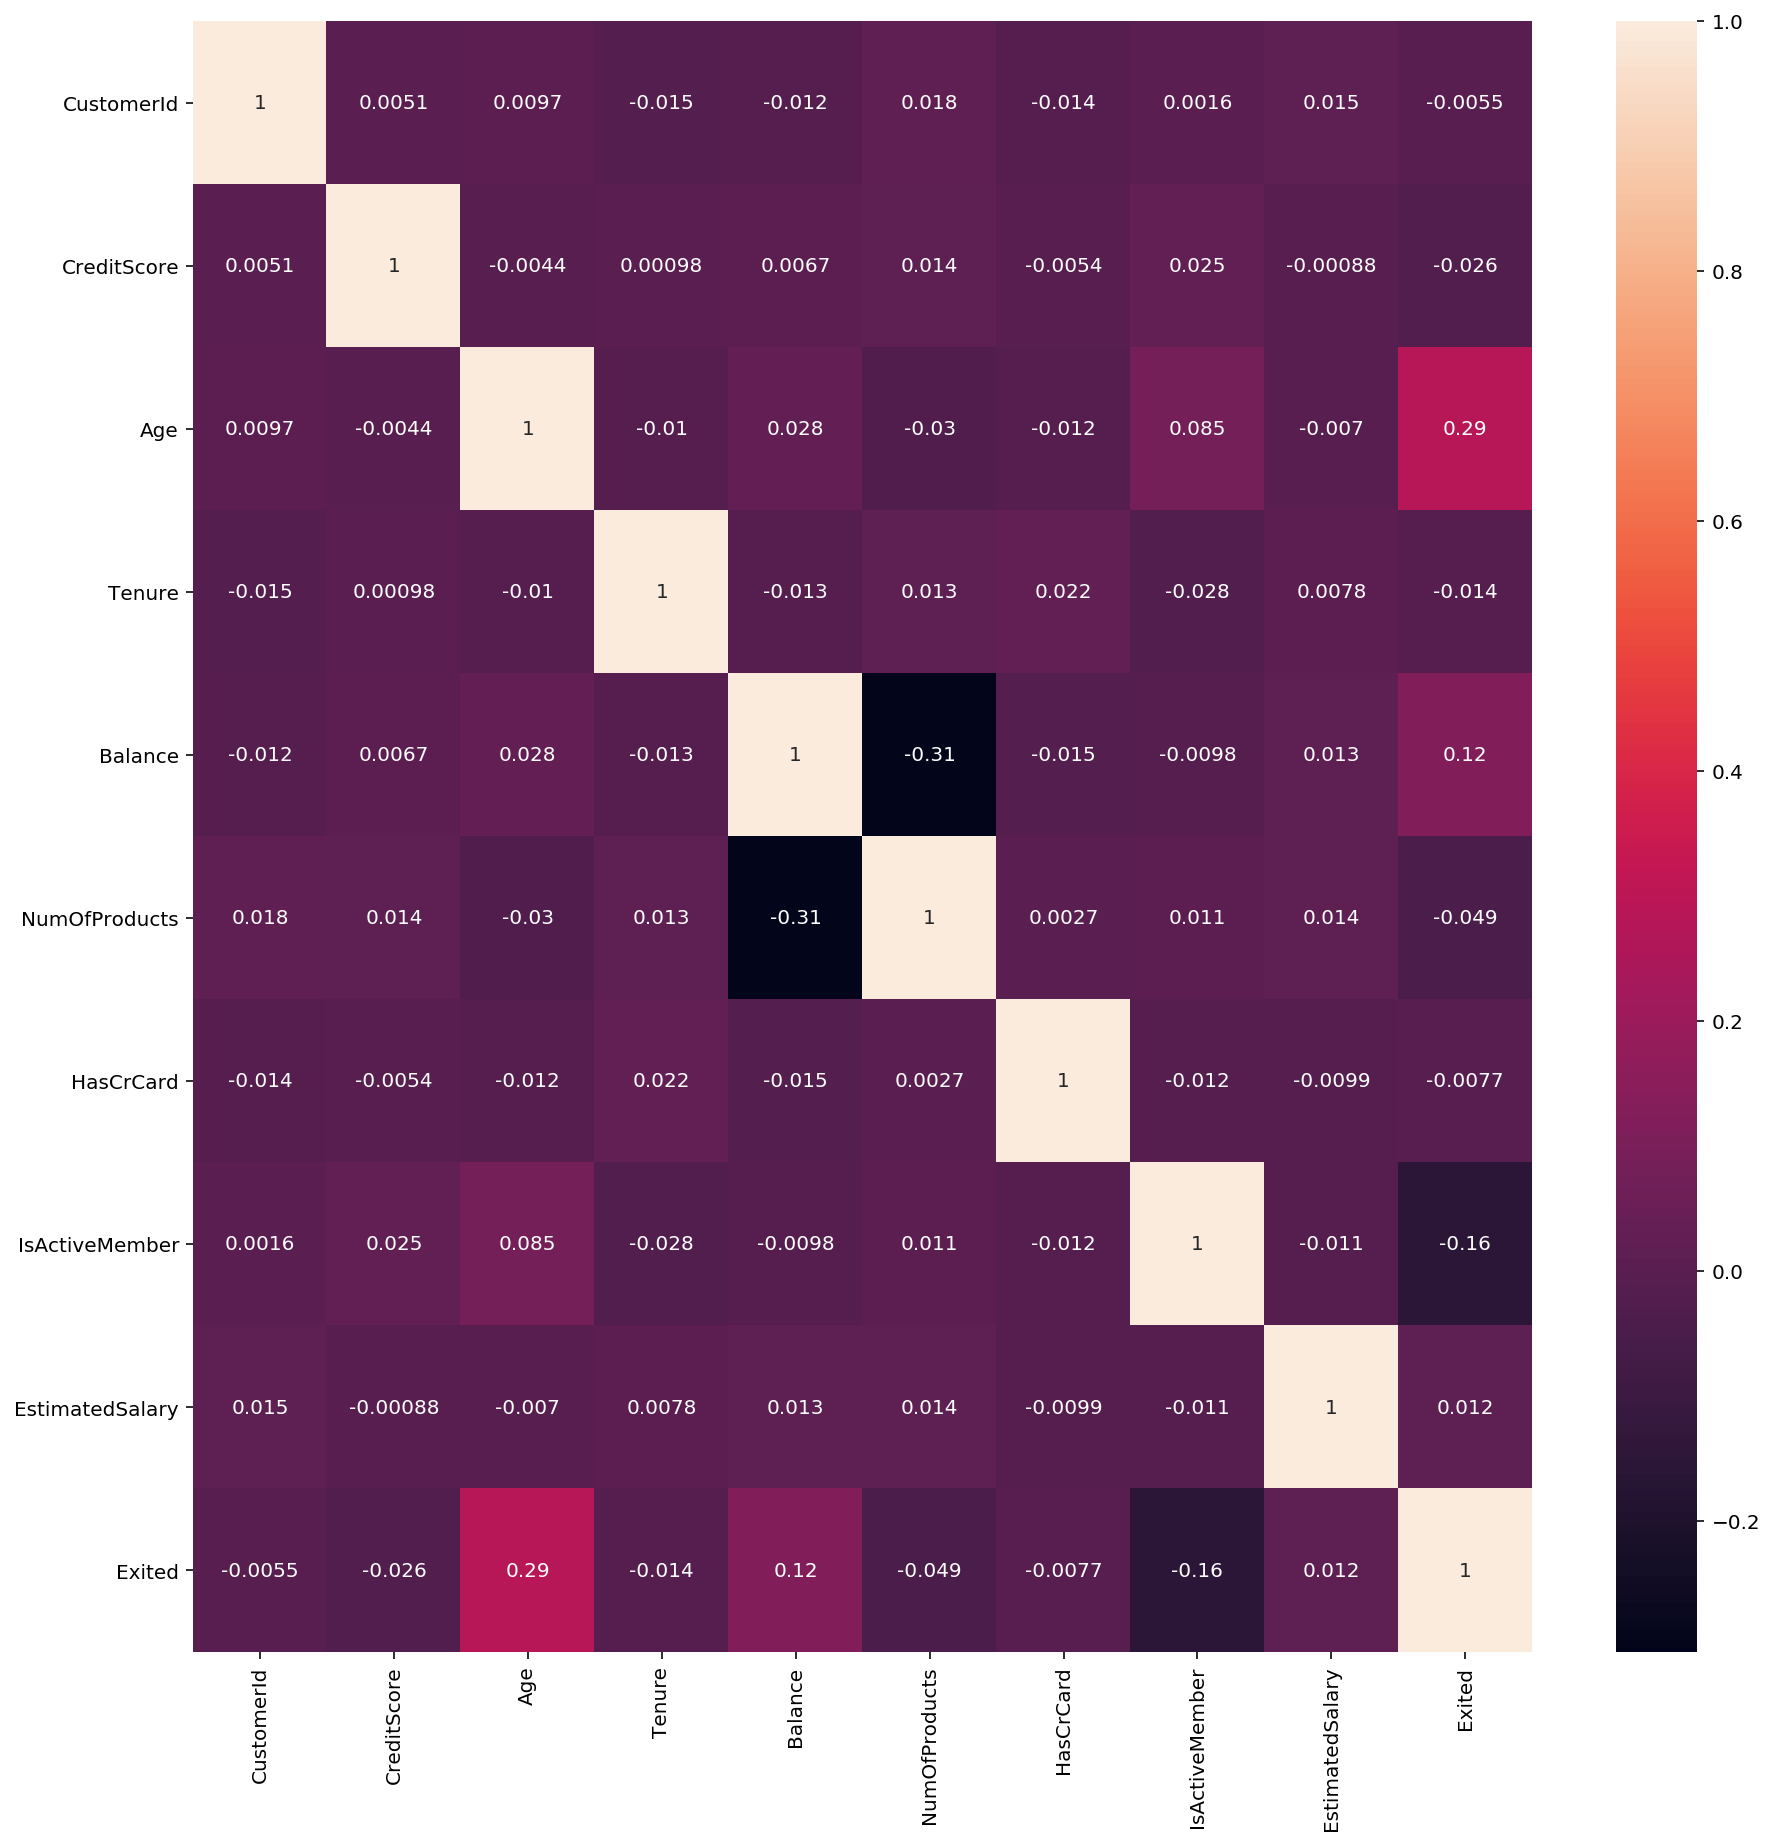

In [96]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

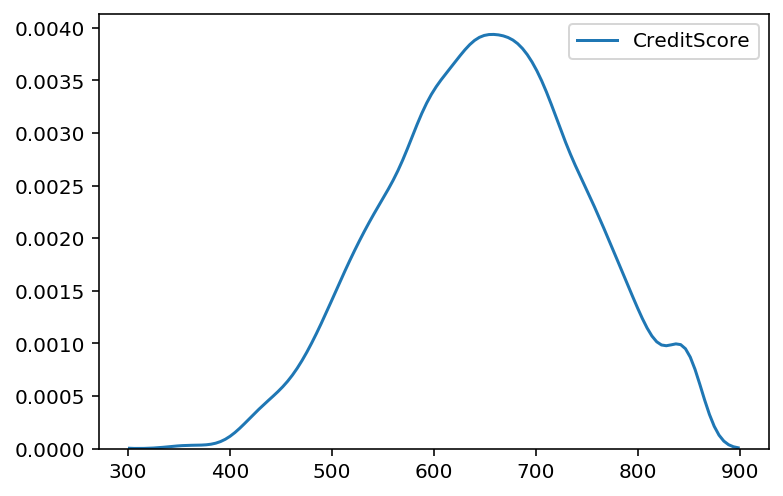

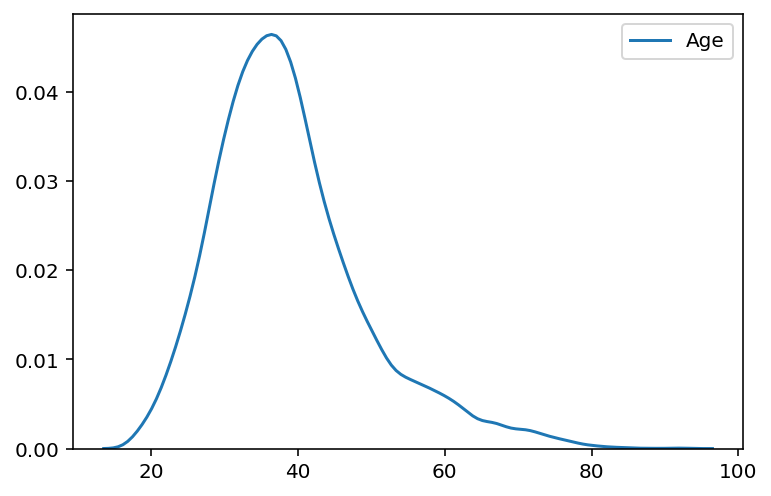

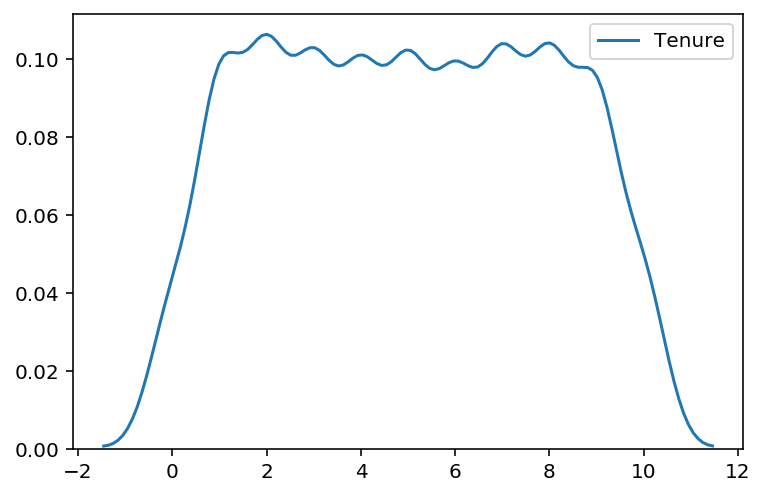

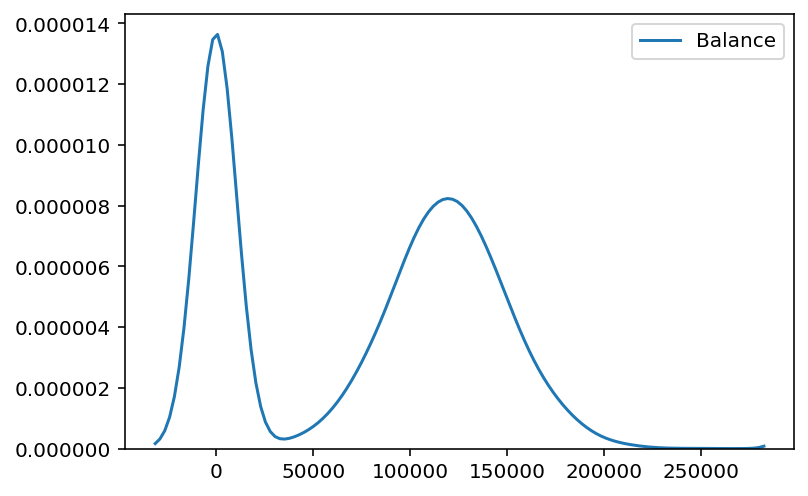

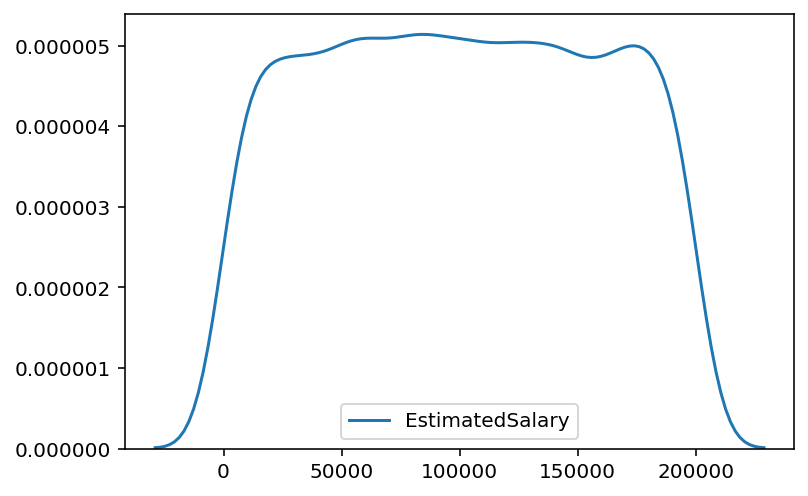

In [97]:
for col in num_features:
    #sns.scatterplot(x=col ,y='EstimatedSalary',data=df,hue='League')
    sns.kdeplot(df[col])
    plt.show()

In [98]:
len(df[df['Balance']==0])

3614

In [99]:
df[df['Balance']==0].describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,3.614000e+03,3614.000000,3614.000000,3614.000000,3614.0,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,1.569199e+07,649.399834,38.430548,5.072773,0.0,1.784726,0.716657,0.517709,99008.936519,0.138074
std,7.195185e+04,96.150990,10.494421,2.860531,0.0,0.496463,0.450684,0.499755,57735.759979,0.345026
min,1.556571e+07,350.000000,18.000000,0.000000,0.0,1.000000,0.000000,0.000000,90.070000,0.000000
25%,1.562954e+07,583.000000,31.000000,3.000000,0.0,1.250000,0.000000,0.000000,49518.460000,0.000000
50%,1.569336e+07,651.000000,37.000000,5.000000,0.0,2.000000,1.000000,1.000000,98619.915000,0.000000
75%,1.575358e+07,716.750000,43.000000,7.000000,0.0,2.000000,1.000000,1.000000,148448.667500,0.000000
max,1.581536e+07,850.000000,88.000000,10.000000,0.0,4.000000,1.000000,1.000000,199992.480000,1.000000


In [100]:
df[df['Balance']!=0].describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6.378000e+03,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,1.569040e+07,651.181562,39.197241,4.979931,119827.706315,1.385387,0.699122,0.513641,100706.209169,0.240514
std,7.193130e+04,96.859826,10.479173,2.909471,30099.100753,0.575861,0.458676,0.499853,57397.978310,0.427429
min,1.556570e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562821e+07,584.000000,32.000000,2.000000,100175.742500,1.000000,0.000000,0.000000,51707.697500,0.000000
50%,1.568960e+07,652.000000,38.000000,5.000000,119845.850000,1.000000,1.000000,1.000000,101105.620000,0.000000
75%,1.575315e+07,718.000000,44.000000,8.000000,139520.260000,2.000000,1.000000,1.000000,149598.117500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [101]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
1,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
2,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0
3,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0
4,15632264,Kay,476,France,Female,34,10,0.00,2,1,0,26260.98,0


### Exploring Categorical Features

In [102]:
df.groupby('Surname').mean()#.sort_values(by='',ascending=False)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Surname,,,,,,,,,,
Abazu,1.564247e+07,647.000000,30.000000,7.500000,42767.415000,1.000000,0.500000,0.000000,108782.110000,0.000000
Abbie,1.573779e+07,818.000000,31.000000,1.000000,186796.370000,1.000000,0.000000,0.000000,178252.630000,0.000000
Abbott,1.569580e+07,689.250000,33.250000,2.500000,54636.102500,1.750000,1.000000,0.500000,79166.460000,0.250000
Abdullah,1.560101e+07,802.000000,60.000000,3.000000,92887.060000,1.000000,1.000000,0.000000,39473.630000,1.000000
Abdulov,1.570668e+07,614.500000,33.500000,6.000000,119347.785000,1.500000,1.000000,1.000000,147758.360000,0.000000
Abel,1.572443e+07,544.000000,40.000000,8.000000,0.000000,2.000000,1.000000,0.000000,61581.200000,0.000000
Abernathy,1.569676e+07,600.500000,33.000000,0.500000,54441.645000,1.500000,1.000000,0.000000,64968.170000,0.000000
Abramov,1.578180e+07,755.000000,41.000000,6.000000,104817.410000,1.000000,1.000000,0.000000,126013.580000,1.000000
Abramova,1.566760e+07,683.500000,47.000000,4.000000,61276.240000,2.500000,0.000000,0.500000,104562.710000,0.500000


Exploring GEOGRAPHY feature
France     0.501401
Germany    0.251001
Spain      0.247598
Name: Geography, dtype: float64


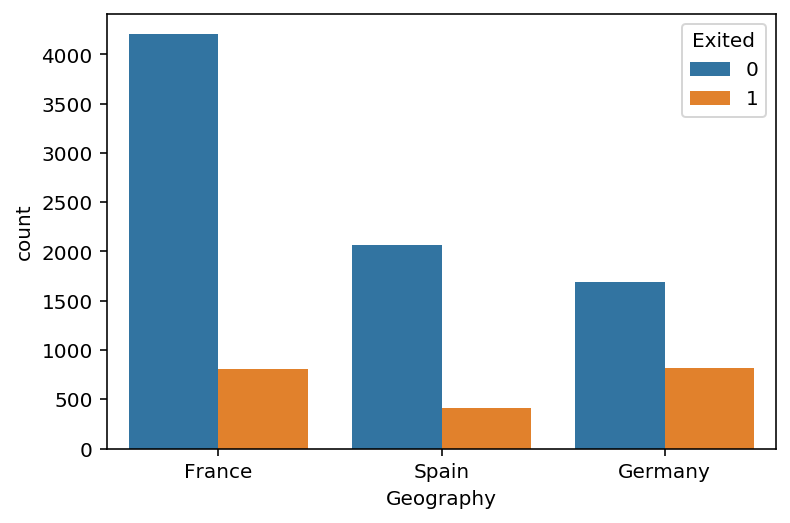

Exploring GENDER feature
Male      0.545937
Female    0.454063
Name: Gender, dtype: float64


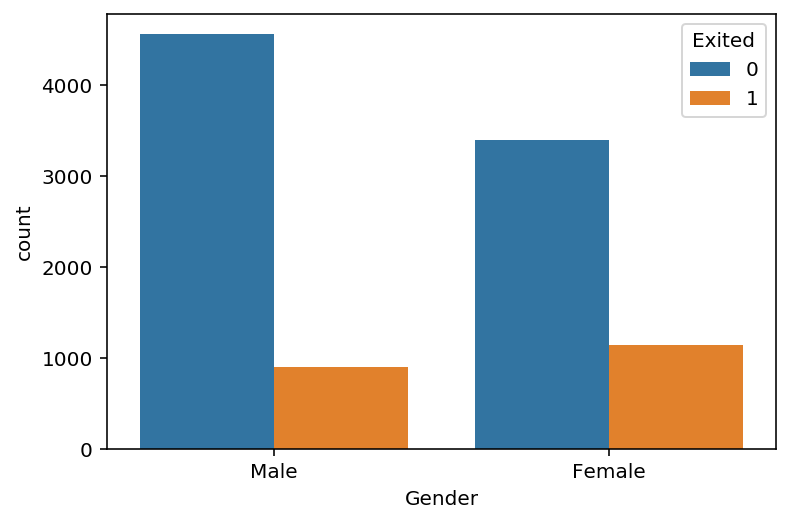

Exploring NUMOFPRODUCTS feature
1    0.508507
2    0.459067
3    0.026521
4    0.005905
Name: NumOfProducts, dtype: float64


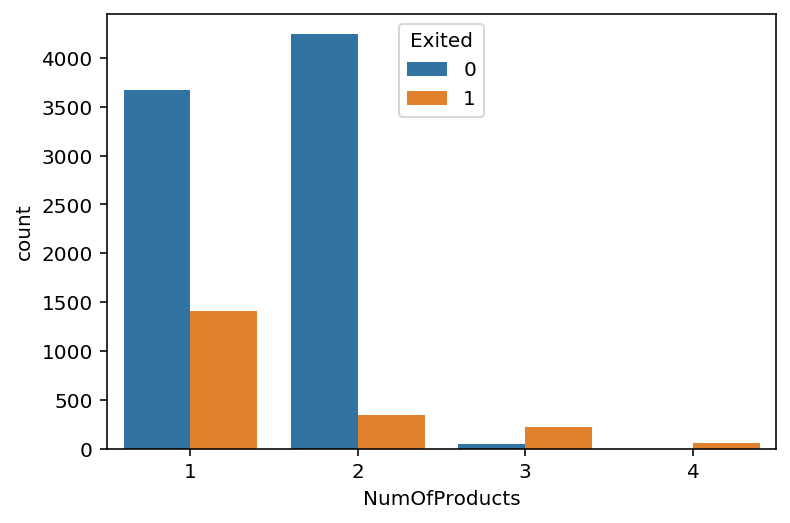

Exploring HASCRCARD feature
1    0.705464
0    0.294536
Name: HasCrCard, dtype: float64


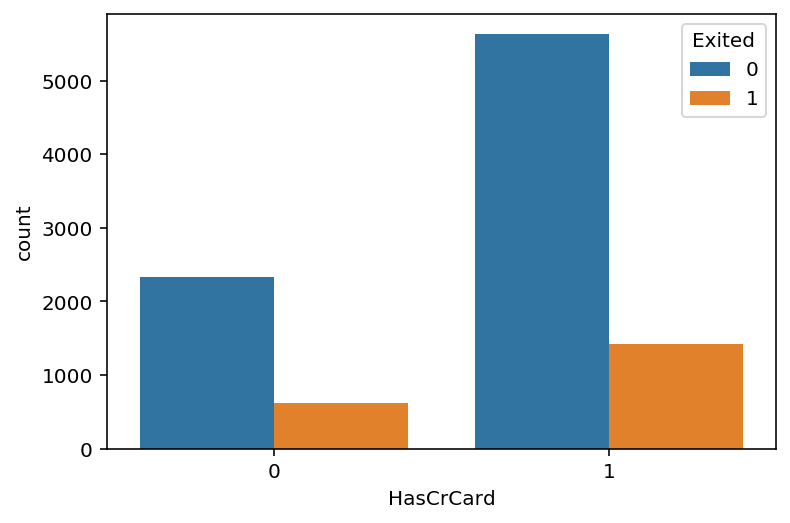

Exploring ISACTIVEMEMBER feature
1    0.515112
0    0.484888
Name: IsActiveMember, dtype: float64


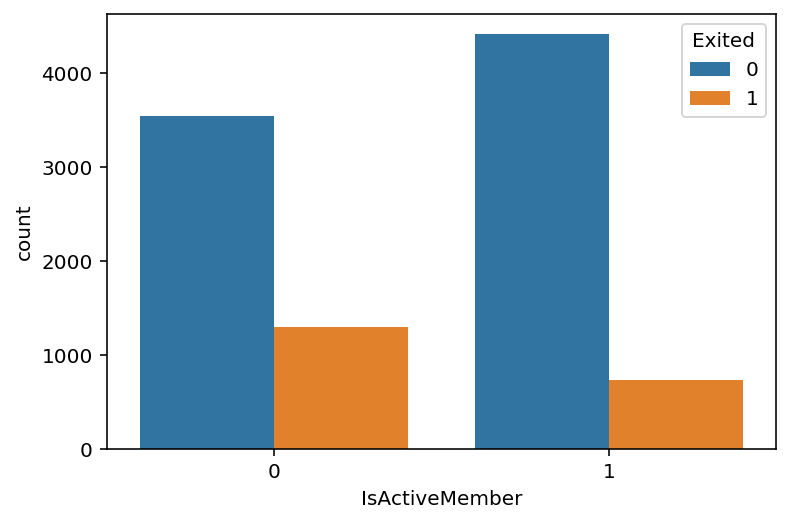

In [103]:
for col in cat_features:
    print('Exploring {} feature'.format(col.upper()))
    print(df[col].value_counts(normalize=True,ascending=False))
    sns.countplot(x=col , data=df, hue='Exited')
    plt.show()

### Feature Engneering

In [120]:
#New Features
#df['New_SurnameCount'] = df.groupby('Surname').transform('count')
df['New_AvgBalance'] = df.groupby('Surname')['Balance'].transform('mean')
df['New_AvgEstimatedSalary'] = df.groupby('Surname')['EstimatedSalary'].transform('mean')
df['New_IsBalanceZero'] = df['Balance'].map(lambda x: 1 if x == 0 else 0)
df['New_TenureAgeRatio'] = df['Tenure']/df['Age']
df['New_BalanceEstimatedSalaryRatio'] = df['Balance']/df['EstimatedSalary']
df['New_BalanceCreditScoreRatio'] = df['Balance']/df['CreditScore']




cat_features.append('New_IsBalanceZero')
num_features.extend(['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio','New_AvgBalance','New_AvgEstimatedSalary'])

In [121]:
df['New_AvgBalance'].value_counts()

-0.761439    662
-0.761439     54
-0.117290     32
-0.181078     29
-0.164866     29
-0.110588     28
-0.102752     26
-0.105009     25
-0.318627     25
-0.101694     25
-0.199187     24
-0.295991     24
 0.084323     23
-0.134339     23
-0.144535     23
-0.098241     23
-0.228696     22
-0.196798     22
-0.138750     22
-0.242178     22
-0.227607     21
-0.025907     21
 0.044966     21
-0.178992     21
-0.160502     21
-0.213853     20
-0.311619     20
-0.144801     20
-0.308745     20
-0.041474     20
-0.071246     20
-0.185381     20
-0.059532     20
-0.037201     20
-0.109035     20
-0.223854     20
-0.252423     20
-0.065365     20
-0.204569     20
-0.218644     19
-0.335297     19
-0.057099     19
-0.207688     19
-0.073794     19
-0.124629     19
-0.282585     19
-0.215674     19
-0.279033     19
-0.151129     19
 0.002804     19
-0.117811     19
-0.256908     19
-0.168819     19
-0.128027     19
-0.196338     19
-0.180589     19
 0.063713     19
-0.056444     18
-0.027641     

In [122]:
# Feature scaling
rc_scaler = RobustScaler()
df[num_features] = rc_scaler.fit_transform(df[num_features])

ValueError: Input contains infinity or a value too large for dtype('float64').

In [115]:
#Feature Transformations
df = pd.get_dummies(df, columns = cat_features, drop_first = True)

## Modelling

In [116]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,EstimatedSalary,Exited,New_AvgBalance,New_AvgEstimatedSalary,New_TenureAgeRatio,New_BalanceEstimatedSalaryRatio,New_BalanceCreditScoreRatio,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1,New_IsBalanceZero_1
0,15792365,He,-1.126866,0.583333,-0.25,0.351368,-0.256484,0,-0.519594,-0.268441,-0.281385,0.758372,0.696684,0,0,1,1,0,0,0,1,0
1,15592389,H?,0.238806,-0.833333,-0.75,0.293028,-0.289146,0,-0.175514,-0.530265,-0.405644,0.745911,0.262041,0,0,1,0,0,0,1,1,0
2,15767821,Bearce,-0.925373,-0.500000,0.25,0.037745,-0.203240,0,0.676864,-0.398673,0.476190,0.346876,0.244125,0,0,1,1,0,0,0,0,0
3,15737173,Andrews,-1.156716,-1.083333,-0.50,-0.761439,-0.241757,0,0.194856,-0.779600,-0.029762,-0.493250,-0.723978,0,1,1,1,0,0,1,0,1
4,15632264,Kay,-1.313433,-0.250000,1.25,-0.761439,-0.751064,0,-0.860611,0.069192,1.218487,-0.493250,-0.723978,0,0,0,1,0,0,1,0,1


In [117]:
y = df["Exited"]
X = df.drop(['Exited','CustomerId','Surname'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=12345)

## Random Forrest

##### Base Model Skorlari
aykiri gozlem + New_Is_BalancedZero -->0.8593

aykirikiri gozlem + ['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio']-->0.8641


aykirikiri gozlem + ['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio','New_AvgBalance']-->86,47

aykirikiri gozlem + ['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio','New_AvgBalance','New_AvgEstimatedSalary]-->86,42



In [118]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [119]:
rf_cv_accuracy =  np.mean(cross_val_score(rf_model, X_train, y_train, cv = 10, scoring = "accuracy"))
rf_cv_accuracy

0.8642579787234043

### Tuning

In [208]:
rf_params = {"max_depth": [5,8,10,None],
              "max_features": [2,5,10,15,17],
              "n_estimators": [100,200, 500, 1000],
               "min_samples_split": [2,5,10,20,30]
                }
rf_model = RandomForestClassifier()
rf_gridcv_model = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_gridcv_model.best_params_

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 54.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 95.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 122.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 399.3min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed: 479.5min finished


{'max_depth': None,
 'max_features': 2,
 'min_samples_split': 20,
 'n_estimators': 1000}

In [ ]:
rf_tuned_cv_acc = np.mean(cross_val_score(rf_tuned_model, X_train, y_train, cv = 10, scoring = "accuracy"))
rf_tuned_cv_acc 

## XGBoost

##### Base Model Skorlari
aykiri gozlem + New_Is_BalancedZero -->0.8571


aykirikiri gozlem + ['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio']-->0.8547


##### Tuned Model Skorlari 

aykiri gozlem + New_Is_BalancedZero -->0.8672


aykirikiri gozlem + ['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio']-->0.8658


In [197]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [198]:
xgb_cv_accuracy =  np.mean(cross_val_score(xgb_model, X_train, y_train, cv = 10, scoring = "accuracy"))
xgb_cv_accuracy

0.8547506257822277

### Tuning

In [51]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]} #gm deki max_features dir. En iyi ayrim icin goz onunde bulundurulmasi gereken max features sayisi. karekok
xgb_model = XGBClassifier()
xgb_gridcv_model = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
xgb_gridcv_model.best_params_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 90.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 106.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 121.5min finished


{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

xgb_params -->{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}
 
0.8672611076345433
 

In [199]:
xgb_tuned_model =XGBClassifier(**xgb_gridcv_model.best_params_)
xgb_tuned_model.fit(X_train, y_train)
y_pred =xgb_tuned_model.predict(X_test)

In [207]:
xgb_tuned_cv_acc = np.mean(cross_val_score(xgb_tuned_model, X_train, y_train, cv = 10, scoring = "accuracy"))
xgb_tuned_cv_acc 

0.865886420525657

## LightGBM

##### Base Model Skorlari
aykiri gozlem + New_Is_BalancedZero -->0.8626


aykirikiri gozlem + ['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio']-->0.8625


##### Tuned Model Skorlari 

aykiri gozlem + New_Is_BalancedZero -->0.8672


aykirikiri gozlem + ['New_TenureAgeRatio','New_BalanceEstimatedSalaryRatio','New_BalanceCreditScoreRatio']-->0.8666


In [201]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)

In [202]:
lgbm_cv_accuracy =  np.mean(cross_val_score(lgbm_model, X_train, y_train, cv = 10, scoring = "accuracy"))
lgbm_cv_accuracy

0.8625087609511889

### Tuning

In [203]:
lgbm_params = {"learning_rate": [0.01,0.001, 0.1, 0.5, 1],
              "n_estimators": [200,500,1000,5000],
              "max_depth": [2,4,6,7,10],
              "colsample_bytree": [1,0.8,0.5,0.4]}
lgbm_model = LGBMClassifier()
lgbm_gridcv_model = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)
lgbm_gridcv_model.best_params_

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

lgbm-->{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 5000}
 
 
 0.8626329787234042

In [204]:
lgbm_tuned_model = LGBMClassifier(**lgbm_gridcv_model.best_params_)
lgbm_tuned_model.fit(X_train, y_train)
y_pred = lgbm_tuned_model.predict(X_test)

In [205]:
lgbm_tuned_cv_acc = np.mean(cross_val_score(lgbm_tuned_model, X_train, y_train, cv = 10, scoring = "accuracy"))
lgbm_tuned_cv_acc 

0.866636576971214

## Model Selection

In [30]:
def select_model(X,y):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=46)
    
    models = [ 
        {
            "name": "RandomForests",
            "estimator": RandomForestClassifier(random_state = 46),
            "hyperparameters":
                {
                "max_depth": [5,8,10,None],
                "max_features": [2,5,10,15,17],
                "n_estimators": [100,200, 500, 1000],
                "min_samples_split": [2,5,10,20,30]
                }
        },
        
        {
            "name": "XGBoost",
            "estimator":XGBClassifier(),
            "hyperparameters":
                {
                 "learning_rate": [0.1,0.01,0.5],
                 "max_depth": [2,3,4,5,8],
                 "n_estimators": [100,200,500,1000],
                  "colsample_bytree": [0.4,0.7,1]               
                 }
        },
        {
            "name": "LightGBM",
            "estimator": LGBMClassifier(),
            "hyperparameters":
                {
                "learning_rate": [0.01,0.001, 0.1, 0.5, 1],
                "n_estimators": [200,500,1000,5000],
                "max_depth": [2,4,6,7,10],
                "colsample_bytree": [1,0.8,0.5,0.4]           
                 }
        },
        
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10,scoring="accuracy")
        grid.fit(X_train, y_train)
        
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["tuned_model"] = grid.best_estimator_
        
        model["validation_acc_score"] = np.mean(cross_val_score(model["tuned_model"], X_train, y_train, cv = 10, scoring = "accuracy"))
        model["test_acc_score"] = accuracy_score(y_test, model["tuned_model"].fit(X_train,y_train).predict(X_test))
      
        #print("Best ......... Score: {}".format(model["best_score"]))
        print("Best VALIDATION ACC Score: {} \n".format(model["validation_acc_score"]))
        print("Best TEST ACC Score: {}".format(model["test_acc_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))


In [31]:
select_model(X,y)

RandomForests
-------------


KeyboardInterrupt: 